<a href="https://colab.research.google.com/github/joshuajhchoi/ai2learn/blob/master/Linear_Regression_California_Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Portions of this page are modifications based on work created and shared by Google and used according to terms described in the Creative Commons 4.0 Attribution License and Apache License, version 2.0

# Linear Regression on California Housing Dataset.

## Introduction

1. What is Linear Regression?

2. How do we calculate that?

3. Just Concept

First we import the basic packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Now we import the datasets which are given in the sample_data folder. (Check the left menu for folders)

In [2]:
housing = pd.read_csv('/content/sample_data/california_housing_train.csv')

train,test = train_test_split(housing,test_size=0.20,random_state=42)

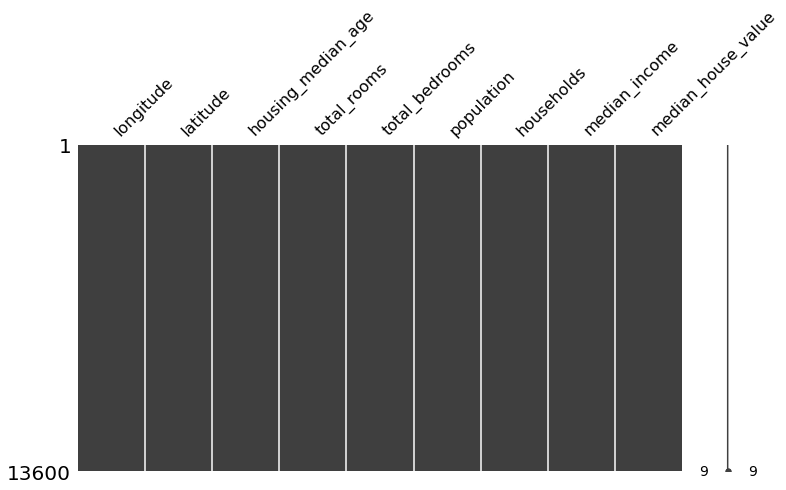

In [3]:
import missingno
missingno.matrix(train, figsize = (12,6))

Now we have two dataset, train and test. We always need to split our data into train and test. We will train the model with the train dataset and then test its accuracy with the test dataset.

In [4]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4679,-118.07,33.81,22.0,2711.0,352.0,1305.0,368.0,8.5407,398800.0
2512,-117.63,33.50,12.0,3619.0,536.0,1506.0,492.0,7.2013,353600.0
993,-117.09,32.57,17.0,444.0,83.0,357.0,87.0,5.1478,138900.0
1327,-117.16,32.81,34.0,2275.0,375.0,1021.0,379.0,3.6371,176300.0
4630,-118.07,34.17,36.0,2415.0,394.0,1215.0,413.0,5.5418,326100.0


Here you can see the first 5 samples of the data. We need to predict the 'mean house price' with the help of all other attributes. So here, our x will be all the attributes and y will be the price. So we are now gonna split the train dataset into x_train and y_train

In [5]:
x_train = train.drop('median_house_value',axis=1)

In [6]:
y_train = train.median_house_value

In [7]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4679,-118.07,33.81,22.0,2711.0,352.0,1305.0,368.0,8.5407
2512,-117.63,33.50,12.0,3619.0,536.0,1506.0,492.0,7.2013
993,-117.09,32.57,17.0,444.0,83.0,357.0,87.0,5.1478
1327,-117.16,32.81,34.0,2275.0,375.0,1021.0,379.0,3.6371
4630,-118.07,34.17,36.0,2415.0,394.0,1215.0,413.0,5.5418


In [8]:
y_train.head()

4679    398800.0
2512    353600.0
993     138900.0
1327    176300.0
4630    326100.0
Name: median_house_value, dtype: float64

As you might have noticed, the .head( ) function displays the first 5 elements in a DataFrame. A DataFrame is a table in pandas. Here as we read train and test with **pd.read_csv( )** function, they are pandas DataFrames. Its much similar to saying that they are Excel spreadsheets.

### Now we can go on to train our model with x_train and y_train




In [9]:
# first import the function from scikit-learn
from sklearn.linear_model import LinearRegression

In [10]:
# create a new object of Linear Regression class
model = LinearRegression()

In [11]:
# fitting the model = finding the perfect line with minimum error
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.score(x_train,y_train)

0.6352694644505287

And with that, we trained out first machine learning model!

But it has only an accuracy of 64% But what does this really mean?
If we inspect the test dataset, we can see that it includes the median_house_value that we need to predict. So we can split the dataset into only its attributes, put it into our model to predict the values and then compare the original median house price with what our model predicted. This will be 64% accurate.

In [13]:
x_test = test.drop('median_house_value',axis=1)

In [14]:
print(x_test.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


In [15]:
model.predict(x_test)

array([143770.39502963, 398615.57056493,  86341.10306742, ...,
        26482.39645034, 283556.48183173, 115808.80622266])

These are the house prices that our model predicted. Now lets look at the actual prices which were given in the dataset.

In [16]:
model.score(x_test,test.median_house_value)

0.6636396350243869

## Our model have 64% training accuracy and 66% testing accuracy.

### But how can we increase the accuracy of the model? There are several methods, known as Hyperparameter Tuning, which can go deep into later on. For now, we can try using another technique than just simple Linear Regression. Let's try using an algorithm called 'Random Forest Regression'

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model2 = RandomForestRegressor()

In [19]:
model2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
model2.score(x_train,y_train)

0.9751649418529151

In [21]:
output = model2.predict(x_test)

In [22]:
model2.score(x_test,test.median_house_value)

0.8233261173783821

In [23]:
model3 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
model3.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
output = model3.predict(x_test)

In [26]:
model3.score(x_test,test.median_house_value)

0.8226576451163228